<a href="https://colab.research.google.com/github/dkchebet7/Descriptive-statistics-univariate-bivariate-multivariate-and-EDA-/blob/master/Copy_of_week_2_IP_Daisy_Chebet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DEFINING THE QUESTION

### a) Specifying the Data Analytic Question

  

 #### Problem Statement : To figure out how we can predict which individuals are most likely to have or use a bank account.

### b) Defining the Metric for Success

####  A Design model that will give us the best predictive analysis with high  predictive strength

### c) Recording the Experimental Design

#### i) Examining correlation between independent variables
#### ii) Bivariate analysis between individual possible factor and having a bank account or not
#### iii) Binary logistic regression for continous variables to determine its relationship with having a bank account or not
#### iv)Fitting the logit function of the logistic regression model 

### d) Data Relevance

## ALL IMPORTS

In [0]:
## Iporting libraries 

#

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## LOADING DATASET

In [0]:
## Loading dataset 
#

url = pd.read_csv('http://bit.ly/FinancialDataset')

In [78]:
## Prevewing the top 5 dataset
#

url.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## CHECKING DATA


In [3]:
## Determining the number of records in a dataset
#

url.shape

(23524, 13)

This shows the dataset has 13 columns and 23524 rows

In [6]:
## checking the datatype of each column
#
 url.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
## Checking for null values in indibidual columns
url.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

### Checking column values of individual columns

In [4]:
url.columns # Lists all the columns in our dataset

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
url.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [0]:
url.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [0]:
url.uniqueid.unique()

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
       'uniqueid_8758', 'uniqueid_8759'], dtype=object)

In [0]:
url['Has a Bank account'].unique()

array(['Yes', 'No', nan], dtype=object)

In [0]:
url['Type of Location'].unique()

array(['Rural', 'Urban', nan], dtype=object)

In [0]:
url['Cell Phone Access'].unique()

array(['Yes', 'No', nan], dtype=object)

In [0]:
url['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [0]:
url['Respondent Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [52]:
url['gender_of_respondent'].unique()

array(['Female', 'Male', nan], dtype=object)

In [0]:
url['The relathip with head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives', nan], dtype=object)

In [0]:
url['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know', nan], dtype=object)

In [0]:
url['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [0]:
url['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

###studying all  the data

In [8]:
import pandas_profiling

pandas_profiling.ProfileReport(url)


Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# CLEANING DATASET

## Checking  for outliers

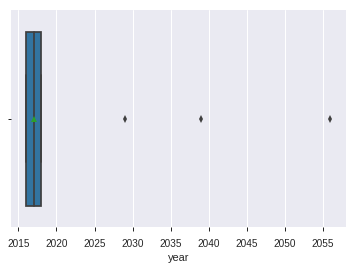

In [79]:
## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(url['year'],showmeans = True)
#url.boxplot(['year'])



Here, there exists ouliers of years abaove 2025

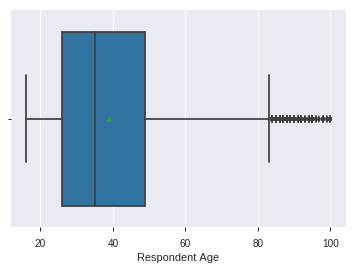

In [29]:
sns.boxplot(url['Respondent Age'],showmeans = True)

Here, ages above 80 years are seen as outliers

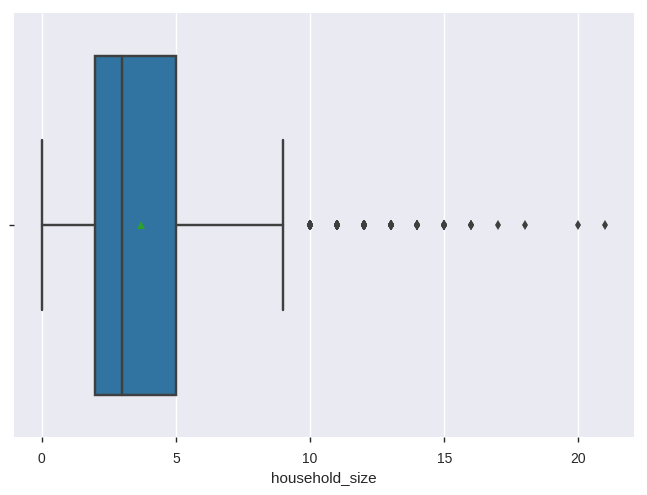

In [0]:
sns.boxplot(url['household_size'],showmeans = True)

household having members above 10 are seen as oultiers.

## Removing null values

In [0]:
## Dropping null values

# since null values sum up only to 0.1% of the total population, its safe to drop them


url= url.dropna()

In [6]:
## Checking for null values in the new datset after dropping the null values


url.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

from the results, al l columns are seen not to have a single null value

## Replacing column names

In [0]:
## Reanaming columns

url.columns = ['country','year','uniqueid','Has_a_Bank_account','Type_of_Location','Cell_Phone_Access','household_size','Respondent_Age','gender_of_respondent','relationship_with_head','marital_status','Level_of_Educuation','Type_of_Job']

In [0]:

## Changing column names to lowercaps

url.columns = url.columns.str.lower()

In [10]:
url.head()# Shows the results of the first 5 rows

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


##Deleting unecessary datset

In [0]:
## Dropping the uniqueid column because we do not require a uniqe identifire in our research

df_url = url.drop(['uniqueid'], axis=1) 

In [12]:
## Viewing the top dataset 

df_url.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
## Dropping years not within(2016 - 2018) because anything else is not within the required range

# create a variable that holds  years above 2018

x = df_url[df_url['year']>2018].index


this code assigns the year above 2018 with a unique variable x that will make it easy for us to delete x

In [0]:
## dropping years above 2018 using the variable(x)created

df_url.drop(x, inplace = True)

In [15]:
## checking the unique values remaining  in the column years

df_url.year.unique()

array([2018, 2016, 2017])

only years 2018,2016 and 2017 are remaining in the dataset

# ANALYSIS

In [16]:
df_url.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

## Univariate Analysis

In [94]:
## plotting a frequency table frequency of the categorical data

df_url.country.value_counts()#.describe().groupby(['country'])

Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64

In [92]:
df_url.type_of_location.value_counts()

Rural    14263
Urban     9077
Name: type_of_location, dtype: int64

In [96]:
df_url.cell_phone_access.value_counts()

Yes    17331
No      6009
Name: cell_phone_access, dtype: int64

In [90]:
df_url.gender_of_respondent.value_counts()

Female    13766
Male       9574
Name: gender_of_respondent, dtype: int64

In [0]:
df_url.relationship_with_head.value_counts()

Head of Household      12729
Spouse                  6470
Child                   2221
Parent                  1069
Other relative           662
Other non-relatives      189
Name: relationship_with_head, dtype: int64

In [0]:
df_url.marital_status.value_counts()

Married/Living together    10698
Single/Never Married        7902
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

In [0]:
df_url.Level_of_Educuation.value_counts()

Primary education                  12688
No formal education                 4467
Secondary education                 4206
Tertiary education                  1143
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level_of_Educuation, dtype: int64

In [97]:
df_url.type_of_job.value_counts()

Self employed                   6361
Informally employed             5549
Farming and Fishing             5422
Remittance Dependent            2508
Other Income                    1077
Formally employed Private       1047
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: type_of_job, dtype: int64

##Bivariate Analysis

### Determining correlation between numerical variables

In [0]:
## Importing plotting libraries 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<function matplotlib.pyplot.show>

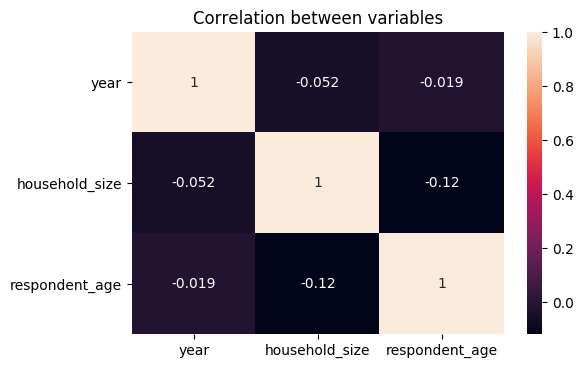

In [18]:
## checking whether the numerical variables affect each other using a correlation matrix

plt.figure(dpi=100)
cr = df_url.corr()
sns.heatmap(cr, xticklabels=cr.columns, yticklabels=cr.columns, annot = True)
plt.title('Correlation between variables')
plt.show


## The correlation matrix below shows that there is veri little correlation between the numerical variables.
# This is because of the values are not close to 1 either(posive or negatve)

The above correlation table shows that there is little significance in the correlation between the independent (Numerical) variables. This is because the correlation values are further away from 1 both positive or negative

## Multivariate Analysis

## Standardisation

In [0]:
## changing the values in 'gender_of_respondent into 0 and 1
df_url['gender_of_respondent'] = df_url.gender_of_respondent.map({'Female':0, 'Male':1})


In [0]:
## changing the values in 'cell_phone_access into 0 and 1
df_url['cell_phone_access']= df_url.cell_phone_access.map({'No':0,'Yes':1})

In [0]:
##  changing the values in 'gender_of_respondent into 0 and 1
df_url['type_of_location'] = df_url.type_of_location.map({'Urban':0, 'Rural':1})

In [0]:
## changing the values in 'has_a_bank_accountinto 0 and 1
df_url['has_a_bank_account'] = df_url.has_a_bank_account.map({'No':0, 'Yes':1})

In [23]:
df_url.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,1,1,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,1,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,0,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,0,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


## Chi_ Square test for independence

### null hypothesis : there is no relationship                                                     between the dependent and                                            independent variables


### Alternative hypthesis: There is a relationship                                                       between dependent and                                                     independent variables

In [45]:
## Testing whether or not there is relationship between having a bank account or not

table = pd.crosstab(df_url['has_a_bank_account'],df_url['type_of_location'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 182.805 p_value 0.000


In [46]:
table = pd.crosstab(df_url['has_a_bank_account'],df_url['country'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 828.631 p_value 0.000


In [47]:
## Testing whether or not there is relationship between having a bank account or not

table = pd.crosstab(df_url['has_a_bank_account'],df_url['year'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 482.575 p_value 0.000


In [48]:
## Testing whether or not there is relationship between having a bank account or not

table = pd.crosstab(df_url['has_a_bank_account'],df_url['gender_of_respondent'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square Statistic 313.698 p_value 0.000


In [49]:
## Testing whether or not there is relationship between having a bank account or not

table = pd.crosstab(df_url['has_a_bank_account'],df_url['cell_phone_access'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))


Chi-square Statistic 1023.139 p_value 0.000


In [50]:
## Testing whether or not there is relationship between having a bank account or not

table = pd.crosstab(df_url['has_a_bank_account'],df_url['relationship_with_head'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))


Chi-square Statistic 321.376 p_value 0.000


In [51]:
## Testing whether or not there is relationship between having a bank account or not

table = pd.crosstab(df_url['has_a_bank_account'],df_url['marital_status'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))


Chi-square Statistic 190.475 p_value 0.000


In [52]:
## Testing whether or not there is relationship between having a bank account or not

table = pd.crosstab(df_url['has_a_bank_account'],df_url['type_of_job'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))


Chi-square Statistic 2999.314 p_value 0.000


From the chi_square analysis above , all the p_values of the statistic are less than the 0.05 level of significance. Because of this we can reject null hypothesis and conclude that the independent variables and the dependent variables are rrelated

In [55]:
## Coverting the whole dataset into numerical values
table = pd.get_dummies(df_url, prefix_sep='_', drop_first=True)
# X head
table.head()

,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,1,1,3.0,24.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,0,1,0,5.0,70.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,1,5.0,26.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,0,1,1,5.0,34.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,0,0,0,8.0,26.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [56]:
table.shape

(23340, 34)

The whole dataset specifica;;y the categorical data has been converted into numeric data to enable statistical analysis of them

## Reducing the number of columns using PCA

In [0]:
## Preprocessing 
 
x = table.drop('has_a_bank_account', 1)
y = table['has_a_bank_account']

Here, the dataset has been grouped into a dependent variable(having a bank account ) and independent variables( the rest of the dataset)

In [58]:
x.head()

,year,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,1,3.0,24.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,5.0,70.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,0,1,5.0,26.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,1,1,5.0,34.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,0,0,8.0,26.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
y.head()

##checking the first 5 rows of the now y variable

0    1
1    0
2    1
3    0
4    0
Name: has_a_bank_account, dtype: int64

In [0]:
## Splitting dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

here, we split the data into 2 groups, the train set(where randomly selected dataset are put through the modelling process) and the test set(where the rest of the uselected variables are taken through a test phase to test the goodness of fit of the model)

In [0]:
X_train.head()

,year,cell_phone_access,household_size,respondent_age,gender_of_respondent,Type_of_Location,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Urban,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
21308,2017,1,1.0,45.0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
19670,2017,0,2.0,33.0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
22965,2018,1,7.0,36.0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
17830,2017,0,1.0,16.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
22284,2018,1,8.0,31.0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
X_train.shape

(18672, 33)

In [62]:
X_test.shape

(4668, 33)

In [63]:
y_train.shape

(18672,)

In [64]:
y_test.shape

(4668,)

In [0]:
## Normalization of data using standard scaler to crfeate a condusive data for using pca

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
## Apllying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
## Explained variance ratio

explained_variance = pca.explained_variance_ratio_

In [69]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
# Predicting the Test set results
 y_pred = classifier.predict(X_test)
  # Performing evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[3941   95]
 [ 419  213]]
0.8898886032562126


the chosen datset after  randomly selecting dataset to be used in the analysiss shows that there is 88% chance of the dataset giging us the correct predictions.

In [0]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

##Building a model

In [0]:
# ## Fitting multiple linear regression in the training set

# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

In [0]:
# ## Performing the model in a test set

# y_pred = regressor.predict(X_test)
# y_pred

In [0]:
# ## visualisation of the prediction

# plt.scatter(y_test,y_pred)

In [0]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

In [71]:
## Bivariate analysis using logistic regression model

# Since the dependent variable is bivariate in nature(can take yes/no),(0/1) and all our independent variables are not correlated, we use a logistic regression bivariate analysis to 
# determine which dataset is useful to  model 
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.289875
         Iterations 8
                                           Results: Logit
Model:                         Logit                         Pseudo R-squared:            0.288     
Dependent Variable:            has_a_bank_account            AIC:                         13597.3474
Date:                          2019-08-19 08:05              BIC:                         13863.2589
No. Observations:              23340                         Log-Likelihood:              -6765.7   
Df Model:                      32                            LL-Null:                     -9503.3   
Df Residuals:                  23307                         LLR p-value:                 0.0000    
Converged:                     1.0000                        Scale:                       1.0000    
No. Iterations:                8.0000                                                               
--------------------------------

from the table above, the variables having a p-valuel less than 0.05 are considered to have influence in having a bank account or not. Therefore all variables having  a p-value above 0.05 are not included in  the finaly analysis model.

In [0]:
## Since most variables have p_value of greater than 0.05, we can drop them and remain only with the necessary columns

cols = ['cell_phone_access','respondent_age','gender_of_respondent','country_Uganda','relationship_with_head_Head of Household','relationship_with_head_Spouse','level_of_educuation_No formal education','level_of_educuation_Primary education','level_of_educuation_Tertiary education','type_of_job_Formally employed Government','type_of_job_Formally employed Private','type_of_job_Government Dependent','type_of_job_Informally employed','type_of_job_No Income']
# X=table[cols]
# y=table['y']

In [0]:
## Reassigning the new dependent and independent variables

x = table[cols]
y = table['has_a_bank_account']

In [78]:
## Usin the logit function of the loistic regreaaion model while fitting the data

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.337649
         Iterations 8
                                     Results: Logit
Model:                      Logit                     Pseudo R-squared:        0.171     
Dependent Variable:         has_a_bank_account        AIC:                     15789.4691
Date:                       2019-08-19 08:15          BIC:                     15902.2801
No. Observations:           23340                     Log-Likelihood:          -7880.7   
Df Model:                   13                        LL-Null:                 -9503.3   
Df Residuals:               23326                     LLR p-value:             0.0000    
Converged:                  1.0000                    Scale:                   1.0000    
No. Iterations:             8.0000                                                       
-----------------------------------------------------------------------------------------
                                    

The coefficients in logit regression: bi indicate the slope and  b_0 indicates the intercept of the expected log odds relative to a one unit change in Xi, holding all other predictors constant. 

Therefore the coef column of the table above shows us to what degeree is the given variable affecting one to have a bank account or not. ie, a person formally employed by tyhe government is 1.8 times more likely to get an account.  

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
##Predicting test results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [83]:
## Confussion matrix
## To show us the number of correct and incorrect predictions
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5918  102]
 [ 719  263]]


the above matrix shows a total of 5918 and 263 correct predictions  and  102 and 719 false pfredictions